# test-15

19 gen 2025

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def make_plots(file_name,reference_file_name=None):
  data = pd.read_csv(file_name)
  pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
  print(data)

  if reference_file_name is not None:
    reference_data = pd.read_csv(reference_file_name)

  plt.figure(figsize=(13, 6))  # Adjust the figure size for two plots

  plt.subplot(1, 2, 1)  # Second subplot (bottom)
  plt.loglog(data['DoFs'], data['ex POINT err'],"r-+", linewidth=1.0, label='Exact Error')
  plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='Estimated Error')
  if reference_file_name is not None:
    plt.loglog(reference_data['DoFs'], reference_data['ex POINT err'],"b:+", linewidth=0.5, label='GlobRef exact error (Reference)')
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.ylabel('Error', fontsize=12)
  plt.title('Exact vs Estimated POINT error', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  plt.subplot(1, 2, 2)  # First subplot (top)
  plt.loglog(data['DoFs'], data['ex POINT err'], "r-+", linewidth=0.5, label='Exact Error')
  plt.loglog(data['DoFs'], abs(data['ex POINT err']-data["est err"]),"y-+", linewidth=0.5, label='Error in [computed value + estimated error]')
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.title('Exact error and residual', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  # Adjust layout and show the plots
  plt.tight_layout()
  plt.show()

config-1 is globref and is only a table

### config-2

GlobRef of circular-step14

   cycle   cells    DoFs     ex POINT err               L2               H1  \
0      0      48      72 8.3787785397e-04 9.6683253800e-03 1.1278931218e-01   
1      1     192     240 2.1372078621e-04 2.4696113553e-03 5.6924811530e-02   
2      2     768     864 5.3048252294e-05 6.2049826073e-04 2.8524248265e-02   
3      3    3072    3264 1.3271861107e-05 1.5530949854e-04 1.4269541203e-02   
4      4   12288   12672 3.3194520620e-06 3.8838619994e-05 7.1356766733e-03   
5      5   49152   49920 8.3001425500e-07 9.7103472280e-06 3.5679502235e-03   
6      6  196608  198144 2.0751980700e-07 2.4276297270e-06 1.7839890100e-03   

      std FLUX err          est err   Cons. FLUX err  
0 3.8822856765e-01 3.4466346643e-04 4.8528600000e-01  
1 6.3299497380e-01 9.7647770331e-05 7.1120000000e-01  
2 7.6834128596e-01 2.5396889180e-05 8.1551600000e-01  
3 8.3986228322e-01 6.5217182700e-06 8.6557300000e-01  
4 8.7667740703e-01 1.6519198250e-06 8.9007900000e-01  
5 8.9536199485e-01 4.1560636300e-07 9

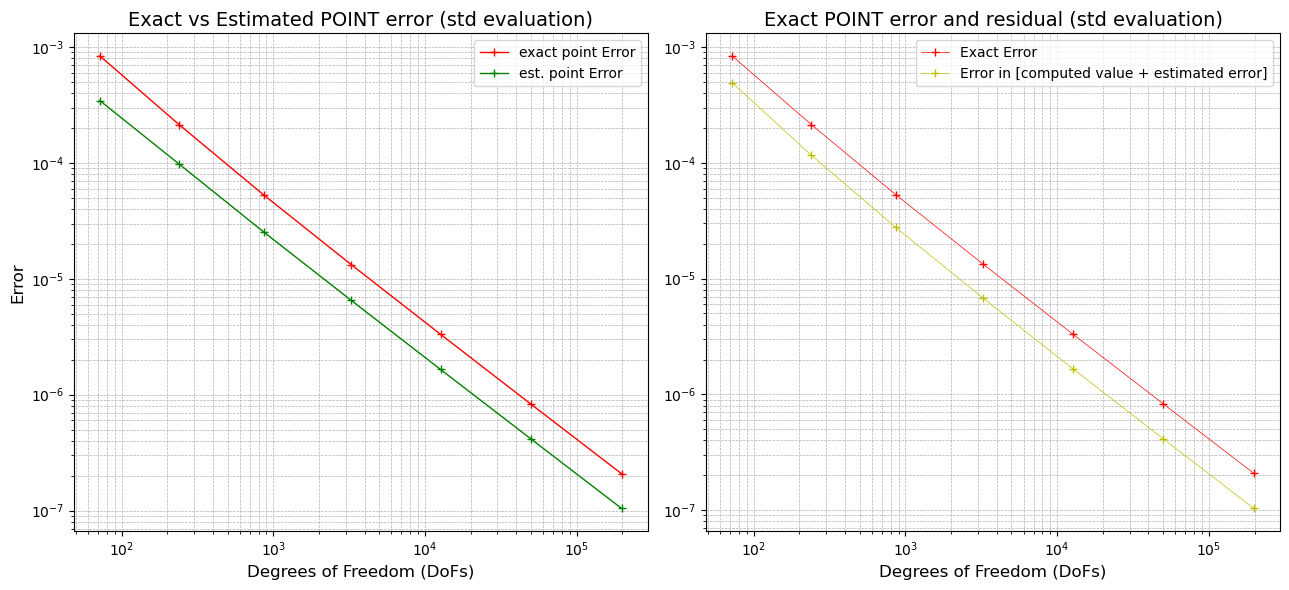

In [1]:
make_plots("./results/convergence_results.csv")

### config-3

GO circular step-14

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0     48     72 3.0577467609e-04 9.1228023787e-03 1.1287577772e-01   
1      1     84    116 3.0158440896e-04 8.0162124670e-03 1.0310698844e-01   
2      2    180    226 2.7167082123e-04 7.5390946194e-03 9.7535596897e-02   
3      3    360    438 1.1132175340e-04 6.5783058522e-03 8.7452713189e-02   
4      4    876   1005 6.1924660991e-05 6.0102280561e-03 8.0450746501e-02   
5      5   2220   2481 2.8545481862e-05 4.7430325164e-03 6.7157390233e-02   
6      6   5508   5968 1.1222006771e-05 2.9282265218e-03 4.8392437611e-02   
7      7  13656  14384 4.4124735750e-06 2.5533797964e-03 4.4615280950e-02   
8      8  34509  36066 1.8884551790e-06 6.2186902133e-04 2.2200070810e-02   
9      9  82356  85320 8.3217811900e-07 4.2155943304e-04 1.6820912614e-02   

      std FLUX err          est err   Cons. FLUX err  
0 3.9269779534e-01 5.0104264331e-04 4.9086900000e-01  
1 4.4481923988e-01 2.9814432810e-04 5.3741

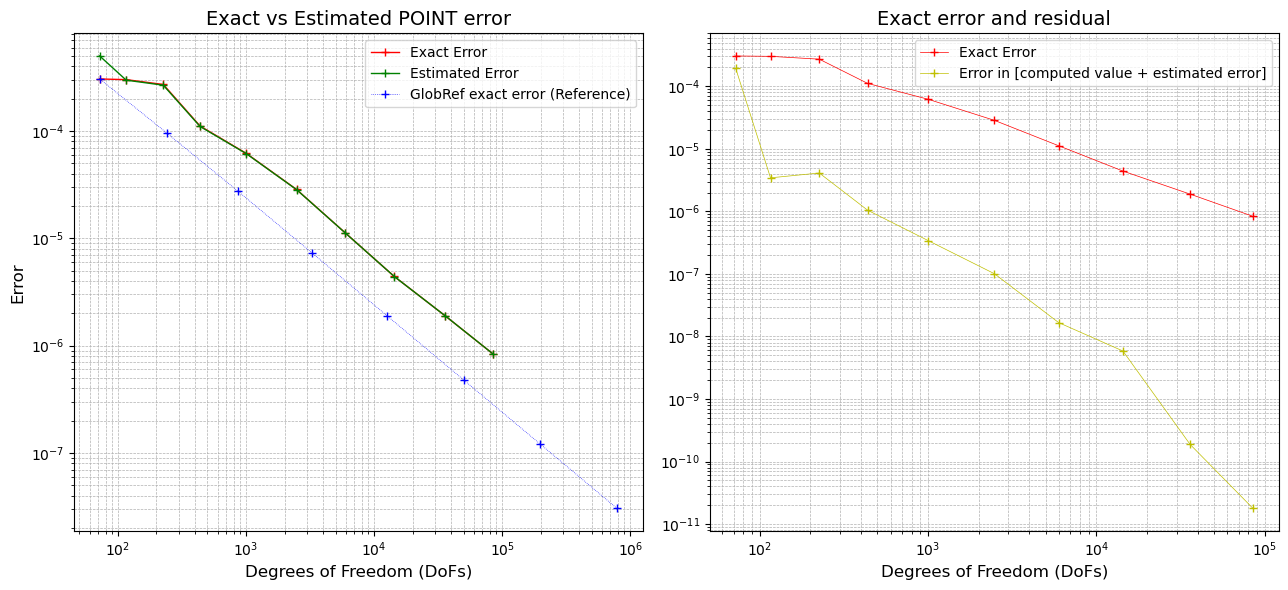

In [16]:
make_plots("./results/config-3/convergence_results.csv","./results/config-1/convergence_results.csv")

### config-4

GO with optimize strategy

    cycle  cells   DoFs     ex POINT err               L2               H1  \
0       0     48     72 8.3787785397e-04 9.6683253800e-03 1.1278931218e-01   
1       1     96    130 2.7571935019e-04 8.0466055619e-03 9.9178766626e-02   
2       2    216    266 1.8053744718e-04 7.5002179076e-03 9.2828468478e-02   
3       3    306    372 1.9914355556e-04 6.9829560136e-03 8.7849873953e-02   
4       4   1056   1182 6.7834767407e-05 5.7346146516e-03 7.4225988636e-02   
5       5   1194   1337 6.3783362734e-05 5.7221641498e-03 7.3838341365e-02   
6       6   4590   4886 1.7362170211e-05 4.1404621331e-03 5.7473173049e-02   
7       7   5010   5330 1.6561493142e-05 4.1238987994e-03 5.7075273452e-02   
8       8  19578  20274 4.3336192930e-06 1.0171085728e-03 2.8386184461e-02   
9       9  75600  77477 1.1267674910e-06 2.8048546846e-04 1.4781765720e-02   
10     10  78630  80296 1.0572893010e-06 2.7029662324e-04 1.4351953992e-02   

       std FLUX err          est err   Cons. FLUX err  
0  3.88

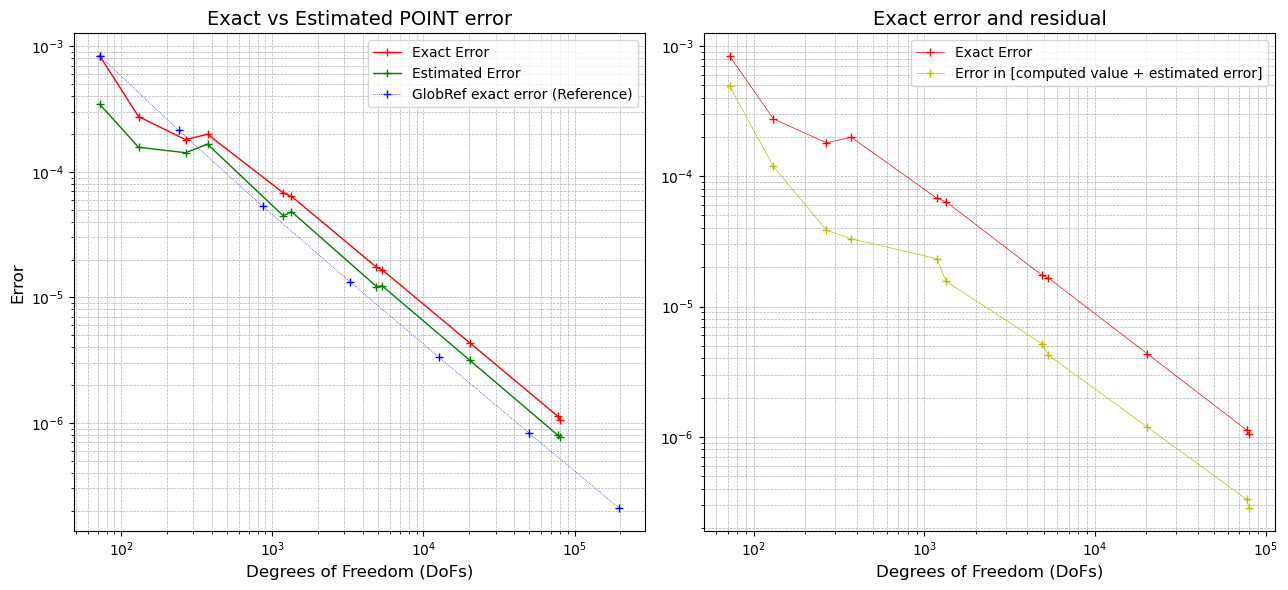

In [12]:
make_plots("./results/config-4/convergence_results.csv","./results/config-1/convergence_results.csv")

Now comparison with Glob Ref on same plot